In [6]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.display import Image 
from keras import regularizers

from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
print(os.listdir(r'D:\aerial-cactus-identification'))

['sample_submission.csv', 'test', 'test.zip', 'train', 'train.csv', 'train.zip']


In [2]:
import numpy as np
import pandas as pd
import os
import cv2

In [3]:
train_dir="D:\aerial-cactus-identification\train\cactus1"
test_dir="D:\aerial-cactus-identification\test\cactus2"
train=pd.read_csv(r"D:\aerial-cactus-identification\train.csv")
print(train)


df_test=pd.read_csv(r'D:\aerial-cactus-identification\sample_submission.csv')
print(df_test)

                                         id  has_cactus
0      0004be2cfeaba1c0361d39e2b000257b.jpg           1
1      000c8a36845c0208e833c79c1bffedd1.jpg           1
2      000d1e9a533f62e55c289303b072733d.jpg           1
3      0011485b40695e9138e92d0b3fb55128.jpg           1
4      0014d7a11e90b62848904c1418fc8cf2.jpg           1
...                                     ...         ...
17495  ffede47a74e47a5930f81c0b6896479e.jpg           0
17496  ffef6382a50d23251d4bc05519c91037.jpg           1
17497  fff059ecc91b30be5745e8b81111dc7b.jpg           1
17498  fff43acb3b7a23edcc4ae937be2b7522.jpg           0
17499  fffd9e9b990eba07c836745d8aef1a3a.jpg           1

[17500 rows x 2 columns]
                                        id  has_cactus
0     000940378805c44108d287872b2f04ce.jpg         0.5
1     0017242f54ececa4512b4d7937d1e21e.jpg         0.5
2     001ee6d8564003107853118ab87df407.jpg         0.5
3     002e175c3c1e060769475f52182583d0.jpg         0.5
4     0036e44a7e8f7218e9bc7

In [4]:
train.head(5)
train.has_cactus=train.has_cactus.astype(str)


In [5]:
print('out dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

out dataset has 17500 rows and 2 columns


In [6]:
train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [7]:
print("The number of rows in test set is %d"%(len(os.listdir(r'D:\aerial-cactus-identification\test\test'))))

The number of rows in test set is 4000


In [8]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "train.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
train/                                         2019-03-07 22:11:24            0
train/008bd3d84a1145e154409c124de7cee9.jpg     2019-03-07 22:07:44         1195
train/0090d921aeb53be7e3df6f4b0254c537.jpg     2019-03-07 22:07:44         1154
train/00e9930f89b5f94f90d0285632f25e9d.jpg     2019-03-07 22:07:44          951
train/00e9d95c663af530b8769d37f92cb13a.jpg     2019-03-07 22:07:44         1175
train/0148bb4a295cf49c0169d69a4a63df7e.jpg     2019-03-07 22:07:44         1099
train/01506b63fb89b2bde4df0d1d63a3004b.jpg     2019-03-07 22:07:44          874
train/015a4952d1ec690fd14c36d35395deec.jpg     2019-03-07 22:07:44          995
train/01e30c0ba6e91343a12d2126fcafc0dd.jpg     2019-03-07 22:07:44         1097
train/0251debcce56e3e7fab5537a74761378.jpg     2019-03-07 22:07:44         1156
train/0290af70d02cbc47e66e4715e6f19ac5.jpg     2019-03-07 22:07:44         1104
train/02abf14275d208b1b43f220fa15519cb.j

train/e8bd0426782ac510def7682b9bb4d0dd.jpg     2019-03-07 22:11:04          967
train/e8fc1ee500ef8e2bd313b702dfeb62d3.jpg     2019-03-07 22:11:04          970
train/e99c2fa12c8ffd4ada79bd1b99a54229.jpg     2019-03-07 22:11:04         1159
train/e99fac1c31e1fcb007285864438bef5d.jpg     2019-03-07 22:11:04         1149
train/e9b31193fb9d825baa20d1fd344c6c46.jpg     2019-03-07 22:11:04         1247
train/e9e15eb3ee8590b8dfee242f23541b55.jpg     2019-03-07 22:11:04         1061
train/ea1e7ab6b5fddf43ac819bc620c50f4e.jpg     2019-03-07 22:11:04         1126
train/ea3b2eaa361004928ffe86b5b1253389.jpg     2019-03-07 22:11:04          759
train/ea9abdfee212fa6da8859aff9d3ad499.jpg     2019-03-07 22:11:04         1146
train/ea9d0a114ad59de8e0076b90389dc154.jpg     2019-03-07 22:11:04         1198
train/eac9afefed9460458d65aed3a9a58639.jpg     2019-03-07 22:11:04         1129
train/eb13ebd614c2c4b2517e055bc235ede5.jpg     2019-03-07 22:11:06          931
train/eb6f00f07e48824d0d0f391124c9e36b.j

train/ecf69eeaabb94d353421029cf8e94ded.jpg     2019-03-07 22:11:06         1193
train/ed38a2faadc872034e434ce4ef7fa985.jpg     2019-03-07 22:11:08          894
train/ed3d2de481025725276781ba6f04c41d.jpg     2019-03-07 22:11:08         1227
train/ed40c923a107d13c1250ba75b29c2f60.jpg     2019-03-07 22:11:08          844
train/edbcb9f975ba46c2157a29f4674ee04a.jpg     2019-03-07 22:11:08         1120
train/ee2c6e836bb149c0ba0d0c5e14911471.jpg     2019-03-07 22:11:08          955
train/ee334016bb8f4a1e20a6b6d0b82fadfa.jpg     2019-03-07 22:11:08         1171
train/ee3d4485da1fee671bbb9cccfd2fc5c6.jpg     2019-03-07 22:11:08         1030
train/ee533cf1111292e53c8434cf05333652.jpg     2019-03-07 22:11:08         1171
train/ee55917858b5519b43a3782f644fff09.jpg     2019-03-07 22:11:08         1165
train/ee57d4cb813066a97287402d484ed095.jpg     2019-03-07 22:11:08         1199
train/ef1f08d3ea9f0dc6c0befbf710ebd2f3.jpg     2019-03-07 22:11:08         1001
train/ef77dd31317323124f07050cfd3ba445.j

train/f09a1b6b51f72ac1645d1ef9f421bd5d.jpg     2019-03-07 22:11:10         1109
train/f0ed9f483417f6699910f1a073b0cf26.jpg     2019-03-07 22:11:10         1055
train/f11c8a770a070d9e5ef64bbbcbd51830.jpg     2019-03-07 22:11:10         1147
train/f12aa9806e992ea378124a3650d69124.jpg     2019-03-07 22:11:10         1190
train/f15adc7e2074c612b241cdfd094134e4.jpg     2019-03-07 22:11:10         1123
train/f168b1386c9078ca1aab6d5207a27c22.jpg     2019-03-07 22:11:10         1128
train/f168e2001e464afff52e799b93535196.jpg     2019-03-07 22:11:10         1075
train/f198943ee354c0429381050580074cce.jpg     2019-03-07 22:11:10         1091
train/f1c7de7d8111d421b29608d3e117d9a4.jpg     2019-03-07 22:11:12         1282
train/f2bc12f07b7490eb8cd2c5055d21414f.jpg     2019-03-07 22:11:12         1142
train/f2df4d1de71f30c6994b4ca1116e1e97.jpg     2019-03-07 22:11:12         1160
train/f2fe98007e832d15c7de9a572ce81c5f.jpg     2019-03-07 22:11:12          934
train/f3f54dcf547ef62bbb0488d1326a2630.j

train/ee525d9f5ed3c78d3eb9ab7f9e005064.jpg     2019-03-07 22:11:08         1173
train/eeddca4270b2b82825138f64470ab965.jpg     2019-03-07 22:11:08         1135
train/ef13fcadc2294f033bb10ebf2b688ad8.jpg     2019-03-07 22:11:08         1160
train/ef58cffe57db35ad79d17e8ed7cd3b6a.jpg     2019-03-07 22:11:08         1046
train/ef9c5c924519eee84b35f4048fd8c42b.jpg     2019-03-07 22:11:10         1247
train/efde2d39222c24caea4216610716ac00.jpg     2019-03-07 22:11:10          955
train/f0397a65b365e3dd0fb0d826bfced19e.jpg     2019-03-07 22:11:10         1146
train/f050acc4027e1da41025c16dd4664cad.jpg     2019-03-07 22:11:10         1167
train/f067043a2bd1fc05dc9d39a4b33b6e38.jpg     2019-03-07 22:11:10         1146
train/f07a67f3d9459e72f3e9fc6f3b8ca621.jpg     2019-03-07 22:11:10          946
train/f0e7500fb7630c12af33b107d8080dde.jpg     2019-03-07 22:11:10         1109
train/f1352344ceda2eaf2d81c4509150be6a.jpg     2019-03-07 22:11:10         1215
train/f16725de59ce7fb77394a53f7fabca1d.j

train/ed9bb7b6af570d300abc4f7335fcf3ef.jpg     2019-03-07 22:11:08          898
train/edbcbe1088d5d09eb062382c6dade177.jpg     2019-03-07 22:11:08          863
train/edc6c989f4f05a9ceb8208e0b1ce299d.jpg     2019-03-07 22:11:08         1134
train/eddbcb681750b94de074c877ae6abc0f.jpg     2019-03-07 22:11:08         1219
train/ede1dc5300783f8fafa68a24731b4644.jpg     2019-03-07 22:11:08         1143
train/edfcf30314fbf52c7b9142987fa9ce1c.jpg     2019-03-07 22:11:08         1184
train/ee22e5d750620659f56f2db2de4375de.jpg     2019-03-07 22:11:08          890
train/ee7b6cb958b6f840dd923f25b88a73c0.jpg     2019-03-07 22:11:08         1061
train/ef0ae3e25d0e87bc66dfb760ae3a1322.jpg     2019-03-07 22:11:08         1137
train/efba46a13bac105168f13f0df65ad818.jpg     2019-03-07 22:11:10          893
train/efd3185fc21ce6bec40324c581a9621a.jpg     2019-03-07 22:11:10         1118
train/efdb02376bcb1a432b4c814663f5412d.jpg     2019-03-07 22:11:10         1195
train/f01cfa4dd6b5cb56c6dbdfd535848696.j

train/ed88de71a95a5b7f0265973c1e5c3fa7.jpg     2019-03-07 22:11:08         1027
train/ed93b13cf1f3624bebddf258e554fbb0.jpg     2019-03-07 22:11:08         1003
train/edee7242722732bda71c4ca67cd9b71e.jpg     2019-03-07 22:11:08         1012
train/edfdc888b44d2f763f477acb9d1dd624.jpg     2019-03-07 22:11:08         1204
train/ee42957827628fad216e4d9b9ebaf688.jpg     2019-03-07 22:11:08         1048
train/ee51517d9e5c0e1e8d3fbfc7e067e24e.jpg     2019-03-07 22:11:08          896
train/ee912193dd53e7e1144820559b816241.jpg     2019-03-07 22:11:08         1196
train/eed346af01cf5dde4a1f74886a995ad8.jpg     2019-03-07 22:11:08         1037
train/eedc0ce03d08740f936cd3bfa088eea5.jpg     2019-03-07 22:11:08         1041
train/ef24b4b0187552f7655fa15674c56468.jpg     2019-03-07 22:11:08         1189
train/ef949f8aa15fb7f2331f40eb1f6ba58a.jpg     2019-03-07 22:11:08         1153
train/f0225b407029067b523bc74e98eef323.jpg     2019-03-07 22:11:10         1201
train/f0604f309f0ced6867b3e9f0e8be7860.j

train/ef9a230ae1337d07e1f7d99c6c8670e4.jpg     2019-03-07 22:11:10          973
train/efa67521dafe622943c7fb9c357efe96.jpg     2019-03-07 22:11:10         1030
train/efb63c4be37e2f5e41e8f4a2d1a14d3b.jpg     2019-03-07 22:11:10          963
train/efd6106cbb897c751e360fe28eb60ac2.jpg     2019-03-07 22:11:10          903
train/f0d0e892dcb8b9d2f21d2422cce9d452.jpg     2019-03-07 22:11:10         1039
train/f0f4b6a55d4b319c07b99bc86482f86c.jpg     2019-03-07 22:11:10         1172
train/f0f645eb20132947f0352afbab014c1c.jpg     2019-03-07 22:11:10         1056
train/f1349383997e64af1c7e0c49615cd9fa.jpg     2019-03-07 22:11:10          919
train/f1404eae8ea905ecf12fe61738f3e5d6.jpg     2019-03-07 22:11:10          990
train/f157cee3dc1764285cd503ef0dd9b62a.jpg     2019-03-07 22:11:10         1059
train/f1805284641c1860653318adb10e3da0.jpg     2019-03-07 22:11:10         1176
train/f184ddd39236b79c714708dfc8285272.jpg     2019-03-07 22:11:10         1077
train/f1b3bafe3ef83e7039150d01772a6d8f.j

train/edb501c39d1a82c2507f62f6fac060e4.jpg     2019-03-07 22:11:08         1011
train/ee6ff68d078bacd43fa7f1360470ac17.jpg     2019-03-07 22:11:08          896
train/ee70f5ebbd2df9b557a94b28c10c66cc.jpg     2019-03-07 22:11:08          875
train/ee8b0db4c63935f636dc5d0f68fbb959.jpg     2019-03-07 22:11:08          937
train/eeb3939d7c279da46a39c44424c9505d.jpg     2019-03-07 22:11:08         1034
train/eec3878e9db5aa077527ff3592d5fb1c.jpg     2019-03-07 22:11:08          920
train/ef2a9fb01e3d0b908d737663df5d70bf.jpg     2019-03-07 22:11:08         1087
train/efb91128a26afd87e45b89ba5483646b.jpg     2019-03-07 22:11:10         1055
train/efbe547e4ce28fe026d43afbdc2a8a68.jpg     2019-03-07 22:11:10          957
train/efcb21ef9ac16ff619b604f349acff5c.jpg     2019-03-07 22:11:10         1189
train/f0c690b2c412ffb8d58db978e7f513d4.jpg     2019-03-07 22:11:10         1246
train/f11c2d90a77cf97f0e3347a41067486e.jpg     2019-03-07 22:11:10         1066
train/f125c3d68a9cb1fde0863e75d2ceb61b.j

train/f034923221ff7d01b15b05c5664b4175.jpg     2019-03-07 22:11:10         1190
train/f035a361084b8242aaf36b9b836ce6ea.jpg     2019-03-07 22:11:10         1212
train/f0902030a7762c886fdc2b0eba8ed0ab.jpg     2019-03-07 22:11:10         1115
train/f0b812a3d80be4d927b60c32a2998eb1.jpg     2019-03-07 22:11:10         1130
train/f0be1cd3d8c2bf525d31049036af3098.jpg     2019-03-07 22:11:10         1178
train/f0d1514f6faad28bf3fcd28dc676cb26.jpg     2019-03-07 22:11:10         1227
train/f19f8260fe9bcc576225e4d09d505e69.jpg     2019-03-07 22:11:10          924
train/f200308e806155b74b512bd3903ab4f1.jpg     2019-03-07 22:11:12         1227
train/f204c9a337dd29e1f7838bd899b151e8.jpg     2019-03-07 22:11:12          922
train/f226fb3b9183aa5de4000050807a701e.jpg     2019-03-07 22:11:12         1190
train/f240e807e0a57bd2bcd8a643dc96907f.jpg     2019-03-07 22:11:12         1122
train/f2a3a2df2e53208a7ed9e85694e341d8.jpg     2019-03-07 22:11:12          955
train/f2a9e45be69c0b7f79dae0869eeb6150.j

train/ecf8bd23fa1c07bec9146b9db02b121e.jpg     2019-03-07 22:11:06          872
train/edc04456dfde12cccd13298c5d55bf77.jpg     2019-03-07 22:11:08         1162
train/eeb4f06ceb84c28d930f4d7222aa9270.jpg     2019-03-07 22:11:08         1018
train/eec0bd1dea4e33c7796a404063513178.jpg     2019-03-07 22:11:08         1162
train/ef322393136ed76b640fd43b69e1279a.jpg     2019-03-07 22:11:08          845
train/ef6d133d7af632a0d6eba7c2ec12f502.jpg     2019-03-07 22:11:08         1151
train/efa9ed2ac8a7f3404dccc90ae2079f54.jpg     2019-03-07 22:11:10         1159
train/f096b2a0d6f504d2e13357be1842dd85.jpg     2019-03-07 22:11:10         1042
train/f0b74d293360e26766c0ff2589898292.jpg     2019-03-07 22:11:10         1031
train/f11eab7bc9859cc7b77821261dcd2a0a.jpg     2019-03-07 22:11:10          941
train/f13f85ff50e2050c17a29f0cb235159d.jpg     2019-03-07 22:11:10          962
train/f15ace81d18312933e1ccaa1aeff1180.jpg     2019-03-07 22:11:10          937
train/f1744e009637f3f0e88aac8b3929304b.j

train/efc7a8ed1679fe9388fc4c78647873b0.jpg     2019-03-07 22:11:10         1213
train/efcd9a809c9ae696b7ca55651c2759ba.jpg     2019-03-07 22:11:10         1093
train/efd7be9dd863e231cc820fdb441a48c1.jpg     2019-03-07 22:11:10         1066
train/eff65598941447538944a8ffbb96d72b.jpg     2019-03-07 22:11:10          972
train/f02b88cfaaeb3472696f92e43bcf0814.jpg     2019-03-07 22:11:10         1171
train/f04f01656c6dec985c28b0dbadf348d9.jpg     2019-03-07 22:11:10          866
train/f0a887ecbb6a0c9837f1373adc5f932a.jpg     2019-03-07 22:11:10          969
train/f0fde4a24e58bb177884b9ed23288c66.jpg     2019-03-07 22:11:10          776
train/f19ca3e08d170c491e24a68407118abb.jpg     2019-03-07 22:11:10         1176
train/f1fa807fcbd0b129d84267b4eeb6b4ee.jpg     2019-03-07 22:11:12         1087
train/f201702c8669ce0451b571dded5c721a.jpg     2019-03-07 22:11:12         1041
train/f27ac7ddcd4076c6d2da3dfc58ae9a9a.jpg     2019-03-07 22:11:12         1177
train/f28b690d78b4cbb275ccb427bab62a62.j

train/e42952e387e9574447758bc279deb8c0.jpg     2019-03-07 22:10:58         1084
train/e43d62f1dba8a444ea6ddad58b3352c0.jpg     2019-03-07 22:10:58         1193
train/e47b2ba8156da929cbc409bf9ea59301.jpg     2019-03-07 22:10:58          919
train/e4a7f454383c691e83f1d55bf204ec90.jpg     2019-03-07 22:10:58         1134
train/e50962f651209ae83847ade1f7a9d90b.jpg     2019-03-07 22:11:00         1126
train/e50a40787dc8694100c87f26bba000ac.jpg     2019-03-07 22:11:00          884
train/e516c8e8f1775e5eb95c9c32292919e7.jpg     2019-03-07 22:11:00         1124
train/e5b03bcf5290e36b551a6f43b92cbe07.jpg     2019-03-07 22:11:00          990
train/e5cf88eb8763b7bcb4608a88c78366d6.jpg     2019-03-07 22:11:00          918
train/e5f42eeafbb9fbb955bd3303801b1f13.jpg     2019-03-07 22:11:00         1309
train/e68ca7deeae7f6ce925779367b1654d3.jpg     2019-03-07 22:11:00         1029
train/e6d495b158655707a0f48b8a8e6833dd.jpg     2019-03-07 22:11:02         1117
train/e708c9103539c6fce596f02b2189d8a8.j

train/9569304be0aeaa000d5c3c79908d289e.jpg     2019-03-07 22:09:50         1109
train/9680a0b17e05e96b5763688bbccb5d42.jpg     2019-03-07 22:09:50         1079
train/96c85fd7c31e1584b752e443fb21ed71.jpg     2019-03-07 22:09:52         1137
train/96ee7e3a66dc77165845dc363340e40a.jpg     2019-03-07 22:09:52         1190
train/96f24d3bef836bf93bba6cd876444817.jpg     2019-03-07 22:09:52         1224
train/971363066c920dc39f64902ccdf6b322.jpg     2019-03-07 22:09:52         1195
train/971df8c6a6cf20ffa24d315c11833a3f.jpg     2019-03-07 22:09:52         1103
train/97cf534fddf8c6949a45a8fa4952c49f.jpg     2019-03-07 22:09:52         1026
train/97ea3d8341976ac44d75364c5dd2cb3c.jpg     2019-03-07 22:09:52          822
train/97f5855eaacad2bf8545e04960099946.jpg     2019-03-07 22:09:52         1197
train/980664c380d44b74f425e426d1286e04.jpg     2019-03-07 22:09:52         1224
train/98b882eb484df356573538f95fbb716b.jpg     2019-03-07 22:09:52         1127
train/98e6349c9ee562e447dac486ab5f09e9.j

train/6e457120c1374eed08201f0d8e28e08d.jpg     2019-03-07 22:09:14         1115
train/6e516463b4f43802249b3c152f052da9.jpg     2019-03-07 22:09:14         1208
train/6e61f112259700cc1003ffa032b43cac.jpg     2019-03-07 22:09:14         1219
train/6ed5f8e8a7320da03e698b8828281e78.jpg     2019-03-07 22:09:14         1092
train/6f6448d4052e9055ed412b1d055cdf37.jpg     2019-03-07 22:09:14         1191
train/6f8d3878c4fb75fb36f6ede7449fb857.jpg     2019-03-07 22:09:14         1052
train/6fee7e0f46e8082a6d901881a050616c.jpg     2019-03-07 22:09:16         1060
train/70476da5fa4198db73e2c2b6f4e568d5.jpg     2019-03-07 22:09:16         1134
train/70c131099dba8e21b5a1f6b01947c7ff.jpg     2019-03-07 22:09:16         1201
train/70d0495dafcdf9c936c31ce68b9f4daa.jpg     2019-03-07 22:09:16         1173
train/70e4fd85634b14af230dfffdbc43af8b.jpg     2019-03-07 22:09:16         1072
train/70e92aa4feaaf3245cb392e2991c8a5a.jpg     2019-03-07 22:09:16         1117
train/710bc8483558bcddc46eeea776cd740b.j

train/2741ec8335a60616daf033ce4542e3da.jpg     2019-03-07 22:08:16         1131
train/278908fd22eff9e76e00f5f1da962d7a.jpg     2019-03-07 22:08:16         1150
train/280a41507711ba9fa53cf74b4bf35019.jpg     2019-03-07 22:08:16         1166
train/281bbc48553ed42089682a5e9c078727.jpg     2019-03-07 22:08:16         1030
train/2826ad43d679f2ec04972879422b2d93.jpg     2019-03-07 22:08:16         1020
train/282e46412d4e35f725482fcd33c1a452.jpg     2019-03-07 22:08:16         1088
train/28323dc8baaff5b5b84c90b328448f7e.jpg     2019-03-07 22:08:16          917
train/2852678503688f80c48ef817b5a0f258.jpg     2019-03-07 22:08:16         1184
train/28fdb52c5c4a8c9ce82d0c1e92190e31.jpg     2019-03-07 22:08:18         1204
train/2927ec91b384141fecc975ad0cbbdb9e.jpg     2019-03-07 22:08:18          887
train/2986d26f0827653dfef9a984d836b832.jpg     2019-03-07 22:08:18          987
train/2a07d18bb90cd1768f1dbe6cb1090763.jpg     2019-03-07 22:08:18         1031
train/2a70bb0d56e91760ac3d3d61660d4df0.j

train/97a5a4bddbf1455cc054eafc8964a10d.jpg     2019-03-07 22:09:52          975
train/98017fe9bd82d787880676df8d2e465a.jpg     2019-03-07 22:09:52          965
train/980c627e6098e181a6339b6c23d38878.jpg     2019-03-07 22:09:52         1162
train/9828df0aee10bf21f370f6df16488e00.jpg     2019-03-07 22:09:52         1241
train/982cf5ef96cb7b8ac97808f1ee28dda1.jpg     2019-03-07 22:09:52          857
train/988db1528c2804b035cfac3670a03867.jpg     2019-03-07 22:09:52          887
train/9926a871d1917683c645787ef29f184d.jpg     2019-03-07 22:09:52         1073
train/99997c8fa69e283179f706d05c286768.jpg     2019-03-07 22:09:54         1053
train/99adcf1e5ce0978ecb9c8791a51918df.jpg     2019-03-07 22:09:54         1071
train/9a18eee9bfe5813b0b9d5f0885ea181f.jpg     2019-03-07 22:09:54          875
train/9a2db8dc30e1f45e16aa76b2a661ad4a.jpg     2019-03-07 22:09:54         1091
train/9a314bdd8eedee333d54fb64f8157518.jpg     2019-03-07 22:09:54         1193
train/9a48a13c75c8c1c03f49c0351e6efbd5.j

train/6ca63bd6239fefb53793ac4d3aaf1cb1.jpg     2019-03-07 22:09:12         1187
train/6cbc21d5ba1bc1cdb5afa338a4575e6a.jpg     2019-03-07 22:09:12         1073
train/6cff4603d49f122560f42fd3b9977d5d.jpg     2019-03-07 22:09:12         1173
train/6d0955a7eb63da3af7f28cc2c8aefed2.jpg     2019-03-07 22:09:12         1006
train/6d1d7e5af9447d4d644b4e14004d59c9.jpg     2019-03-07 22:09:12         1132
train/6d97ef02f161596538bf51e41fb48930.jpg     2019-03-07 22:09:14          788
train/6e24d0ce79f2001200a2d71bca7c6514.jpg     2019-03-07 22:09:14          995
train/6e27d87c3deaf8bd3a505a26d589d623.jpg     2019-03-07 22:09:14         1170
train/6e2edb0306943dd67bde22d8d343316c.jpg     2019-03-07 22:09:14         1157
train/6eae8d9a9f268dcbc191316abffa84e7.jpg     2019-03-07 22:09:14          909
train/6ecf0b9bf81db2327247a0b01b29e6cb.jpg     2019-03-07 22:09:14         1111
train/6f1e6b1dfd72bc03d9c2440439fcee0f.jpg     2019-03-07 22:09:14         1107
train/6f48d1710b9d7af5421085fca968db99.j

train/2a3eb584c21460ba14cdc8a9ea2078ee.jpg     2019-03-07 22:08:18         1258
train/2aac35783c53f009c73a83c694378668.jpg     2019-03-07 22:08:18          998
train/2ab25e5907487dd526e1bd4f22ff2327.jpg     2019-03-07 22:08:18         1040
train/2ade143ea688b0ef7653a4568f3fe952.jpg     2019-03-07 22:08:18         1095
train/2afa5c2c80403ce32855057131dba7b7.jpg     2019-03-07 22:08:18         1103
train/2b6c68dc849607da27a96b49a4a363cf.jpg     2019-03-07 22:08:20          914
train/2bcf4a7ebaca2091d9d2a27cb4dc17eb.jpg     2019-03-07 22:08:20         1108
train/2c04d8411233a60a00e5e4851e8bd2ad.jpg     2019-03-07 22:08:20         1116
train/2c0984e448cb0a5707a9ff28d1ddf13f.jpg     2019-03-07 22:08:20         1150
train/2c6e478dd45f00a41cf8c2c6e0fcdc8f.jpg     2019-03-07 22:08:20         1219
train/2c8b6f347ae64d2794f9f625ce71fb96.jpg     2019-03-07 22:08:20         1179
train/2cacdef4d97bc4ed46c08adad29a4973.jpg     2019-03-07 22:08:20          922
train/2ccff30adf2af2609407aecfc661b373.j

train/f77b8ce1d7d9ab09b61d8532642d9e4c.jpg     2019-03-07 22:11:16         1056
train/f8a35606775f82afd9c041a0a53c8c5d.jpg     2019-03-07 22:11:18         1208
train/f8ae4d188c3b8d5bddf9a951292085b8.jpg     2019-03-07 22:11:18         1147
train/f8c0b24fa0490b66c81770b45e8bc9ef.jpg     2019-03-07 22:11:18         1175
train/f9146266c416dcb08d31ce69b1a2a666.jpg     2019-03-07 22:11:18         1165
train/f976004b3c319ec31d32b177635a513c.jpg     2019-03-07 22:11:18         1147
train/fa1a5b25cc52523b017ff405472a64b0.jpg     2019-03-07 22:11:18          933
train/fa329e244e2971c538bb1239478cb4ca.jpg     2019-03-07 22:11:18         1180
train/fa8c263e0789c8f6c33a013c1c5f4380.jpg     2019-03-07 22:11:18         1034
train/fae3baf90e2abfc0a0aa473675479294.jpg     2019-03-07 22:11:18         1101
train/fae5d861a172edf5b7f4839928b1488d.jpg     2019-03-07 22:11:20         1148
train/fb0624c0ebc01643a8f4318537099078.jpg     2019-03-07 22:11:20          961
train/fb39abf0d69526710964bf07b6c663c4.j

Done!


In [9]:
# Import python libraries
import matplotlib.pyplot as plt
import os
print(os.name)


from tqdm import tqdm
import random
#Files saving lib
import pickle
# Import numpy and fore it to print full array
import numpy as np
# Import sys
import sys
np.set_printoptions(threshold=sys.maxsize)
dataDir = r'.\train'
print(dataDir)

nt
.\train


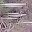

In [10]:
Image(os.path.join(r".\train",train.iloc[0,0]),width=250,height=250)

In [11]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

In [12]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=r".\train",x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))

Found 15001 validated image filenames belonging to 2 classes.


In [13]:
validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=r".\train",x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))


Found 2500 validated image filenames belonging to 2 classes.


In [14]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [16]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.rmsprop(),metrics=['acc'])

In [17]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)


Epoch 1/10
100/100 [==============================] - ETA: 52:52 - loss: 0.7137 - acc: 0.24 - ETA: 41:30 - loss: 1.4525 - acc: 0.50 - ETA: 35:27 - loss: 1.2183 - acc: 0.40 - ETA: 32:30 - loss: 1.0763 - acc: 0.49 - ETA: 30:25 - loss: 0.9854 - acc: 0.53 - ETA: 28:49 - loss: 0.9237 - acc: 0.57 - ETA: 27:52 - loss: 0.8812 - acc: 0.59 - ETA: 26:41 - loss: 0.8513 - acc: 0.61 - ETA: 26:00 - loss: 0.8121 - acc: 0.62 - ETA: 25:35 - loss: 0.9200 - acc: 0.64 - ETA: 25:02 - loss: 0.8965 - acc: 0.65 - ETA: 24:23 - loss: 0.8745 - acc: 0.66 - ETA: 24:05 - loss: 0.8514 - acc: 0.66 - ETA: 24:01 - loss: 0.8235 - acc: 0.67 - ETA: 23:42 - loss: 0.7982 - acc: 0.68 - ETA: 23:11 - loss: 0.7769 - acc: 0.68 - ETA: 22:45 - loss: 0.7809 - acc: 0.68 - ETA: 22:22 - loss: 0.7719 - acc: 0.69 - ETA: 22:02 - loss: 0.7603 - acc: 0.69 - ETA: 21:51 - loss: 0.7433 - acc: 0.70 - ETA: 21:32 - loss: 0.7369 - acc: 0.70 - ETA: 21:12 - loss: 0.7287 - acc: 0.70 - ETA: 20:50 - loss: 0.7158 - acc: 0.70 - ETA: 20:32 - loss: 0.7063 

100/100 [==============================] - ETA: 11:48 - loss: 0.0534 - acc: 0.99 - ETA: 11:28 - loss: 0.0625 - acc: 0.98 - ETA: 11:11 - loss: 0.0537 - acc: 0.98 - ETA: 12:17 - loss: 0.0576 - acc: 0.97 - ETA: 12:08 - loss: 0.0519 - acc: 0.97 - ETA: 12:02 - loss: 0.0489 - acc: 0.98 - ETA: 11:44 - loss: 0.0531 - acc: 0.97 - ETA: 11:31 - loss: 0.0657 - acc: 0.97 - ETA: 11:18 - loss: 0.0709 - acc: 0.97 - ETA: 11:05 - loss: 0.0701 - acc: 0.97 - ETA: 10:54 - loss: 0.0670 - acc: 0.97 - ETA: 10:44 - loss: 0.0645 - acc: 0.97 - ETA: 10:34 - loss: 0.0624 - acc: 0.97 - ETA: 10:29 - loss: 0.0608 - acc: 0.97 - ETA: 10:17 - loss: 0.0636 - acc: 0.97 - ETA: 10:07 - loss: 0.0695 - acc: 0.97 - ETA: 9:58 - loss: 0.0677 - acc: 0.9729 - ETA: 9:47 - loss: 0.0657 - acc: 0.973 - ETA: 9:41 - loss: 0.0719 - acc: 0.971 - ETA: 9:32 - loss: 0.0995 - acc: 0.963 - ETA: 9:22 - loss: 0.1045 - acc: 0.960 - ETA: 9:12 - loss: 0.1059 - acc: 0.960 - ETA: 9:06 - loss: 0.1055 - acc: 0.959 - ETA: 9:05 - loss: 0.1047 - acc: 0.95

100/100 [==============================] - ETA: 16:06 - loss: 0.0102 - acc: 1.00 - ETA: 14:58 - loss: 0.0591 - acc: 0.98 - ETA: 15:31 - loss: 0.2660 - acc: 0.93 - ETA: 11:44 - loss: 0.3509 - acc: 0.93 - ETA: 11:22 - loss: 0.3527 - acc: 0.91 - ETA: 11:09 - loss: 0.3287 - acc: 0.90 - ETA: 11:04 - loss: 0.2952 - acc: 0.92 - ETA: 11:22 - loss: 0.2617 - acc: 0.93 - ETA: 11:09 - loss: 0.2337 - acc: 0.93 - ETA: 10:48 - loss: 0.2112 - acc: 0.94 - ETA: 10:36 - loss: 0.1936 - acc: 0.95 - ETA: 10:20 - loss: 0.1781 - acc: 0.95 - ETA: 10:06 - loss: 0.1654 - acc: 0.95 - ETA: 9:55 - loss: 0.1555 - acc: 0.9610 - ETA: 9:43 - loss: 0.1456 - acc: 0.963 - ETA: 9:31 - loss: 0.1368 - acc: 0.966 - ETA: 9:23 - loss: 0.1289 - acc: 0.968 - ETA: 9:14 - loss: 0.1220 - acc: 0.970 - ETA: 9:07 - loss: 0.1161 - acc: 0.971 - ETA: 8:57 - loss: 0.1104 - acc: 0.973 - ETA: 8:46 - loss: 0.1078 - acc: 0.974 - ETA: 8:38 - loss: 0.1039 - acc: 0.974 - ETA: 8:29 - loss: 0.0998 - acc: 0.975 - ETA: 8:20 - loss: 0.0957 - acc: 0.97

In [25]:
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.1.0


In [38]:
!mkdir -p saved_model


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


In [44]:
model.save('saved_model/my_model')

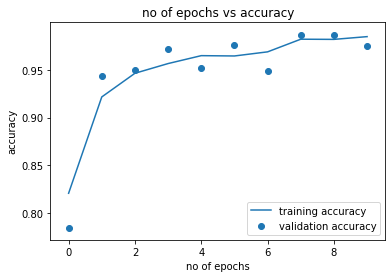

In [40]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()


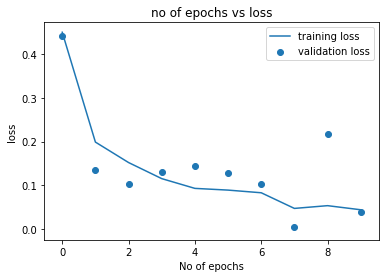

In [41]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

In [42]:
y_pre=model.predict_proba(test_features)

NameError: name 'test_features' is not defined

In [43]:
df=pd.DataFrame({'id':df_test['id'] })
df['has_cactus']=y_pre
df.to_csv("submission.csv",index=False)

NameError: name 'y_pre' is not defined

In [45]:
model.save('my_model.h5')

In [12]:
from keras import layers, model

model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data',encode.inverse_transform(predict))

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))


ImportError: cannot import name 'model' from 'keras' (D:\anaconda\lib\site-packages\keras\__init__.py)